# TD 1: Simple MLP from scratch



Further material
https://github.com/karpathy/micrograd


# Preliminary

Go to 
https://playground.tensorflow.org/
and tinker with the different architectures parameters. 

What do the colors on the edges mean? On the nodes?

If necessary: install pytorch by running 

`pip3 install torch`

(in a a virtual environment)

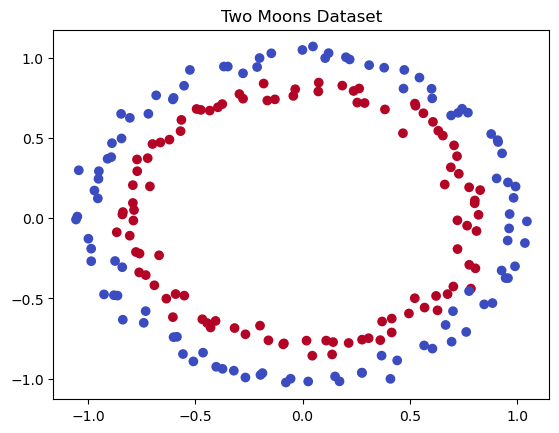

Generated data X shape: (200, 2), y shape: (200, 1)


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles

# Generate synthetic data
X, y = make_circles(n_samples=200, noise=0.04, random_state=42)
y = y.reshape(-1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.coolwarm)
plt.title("Two Moons Dataset")
plt.show()
print(f"Generated data X shape: {X.shape}, y shape: {y.shape}")


## Implementing a Neural Network from Scratch

Implement backpropagation on the following network
$$
\begin{aligned}
z^{(1)} &= X W_1 + b_1\\[4pt]
a^{(1)} &= \tanh\big(z^{(1)}\big)\\[4pt]
z^{(2)} &= a^{(1)} W_2 + b_2\\[4pt]
a^{(2)} &= \mathrm{Sigmoid}\big(z^{(2)}\big) = \frac{1}{1+e^{-z^{(2)}}}\\[4pt]
\hat{y} &= a^{(2)}
\end{aligned}
$$

Step 1: Initialize parameters
- What are the dimensions of $W_1, b_1, W_2, b_2$? 

In [ ]:
def init_params(n_input, n_hidden, n_output, seed=0):
    np.random.seed(seed)
    # YOUR CODE HERE
    return W1, b1, W2, b2

Step 2: Forward propagation


Write the dimensions of intermediate array you compute


In [ ]:
def sigmoid(z):
    # YOUR CODE HERE
    pass


def tanh(z):
    # YOUR CODE HERE
    pass


def forward(X, W1, b1, W2, b2):
    """
    X.shape = (m, n_input)
    W1.shape = ??
    b1.shape = ??
    W2.shape = ??
    b2.shape = ??
    """
    # YOUR CODE HERE
    return z1, a1, z2, a2

In [ ]:
def compute_loss(y, a2):
    # YOUR CODE HERE
    pass

## Backpropagation

Network: input X (m×2) → linear1 z1 = XW1 + b1 (m×h) → a1 = tanh(z1) (m×h) → z2 = a1W2 + b2 (m×1) → a2 = σ(z2) (m×1)  
Loss: binary cross‑entropy (averaged over m).
 

In [ ]:
def backward(X, y, z1, a1, a2, W2):
    m = y.shape[0]  # batch size
    # YOUR CODE HERE
    return dW1, db1, dW2, db2

Implement the gradient descent updates.
(Bonus: add momentum?)

In [ ]:
def gd_step(W1, b1, W2, b2, dW1, db1, dW2, db2, lr=0.1):
    # YOUR CODE HERE
    return W1, b1, W2, b2

# Full training

In [ ]:
N_steps = 100
lr = 0.1
W1, b1, W2, b2 = init_params(2, 20, 1, seed=0)
train_losses = []
for epoch in range(N_steps):
    # Forward pass
    # YOUR CODE HERE (compute loss)
    # Backward pass
    # YOUR CODE HERE
    # Gradient descent step
    # YOUR CODE HERE
    # Logging
    # train_losses.append(loss)
    if epoch % 1000 == 0:
        continue
        # print(f"Epoch {epoch}, loss = {loss:.4f}")

plt.plot(train_losses)

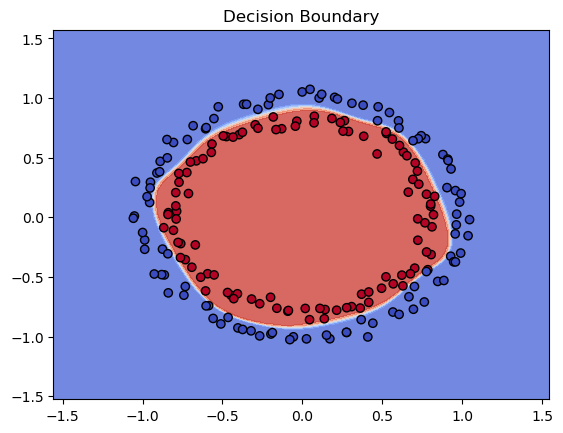

In [50]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    _, _, _, probs = model(grid)
    probs = probs.reshape(xx.shape)
    plt.contourf(xx, yy, probs, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.coolwarm, edgecolors="k")
    plt.title(title)
    plt.show()


def model(X):
    return forward(X, W1, b1, W2, b2)


plot_decision_boundary(model, X, y)

In practice, the approach used here does not scale well in terms of code: 
- we hardcoded the functions used in the backwards function. If we wanted to replace 
tanh by another function, we would have to carefully track where its gradient is 
computed. 
- all the arguments have to be passed through multiple times

Automatic differentiation libraries represent parameters by objects that store :
- a computational graph, in which the children of a node are the parameters that depend 
on that node. (Technically, node stores its parents.) The forward pass builds the 
graph, and the backward pass traverses it in reverse to compute gradients.
- the gradient of that parameter accumulated during the backward pass.

(see micrograd, autograd, pytorch). 

This approach makes it easy to compose a large number of functions together and differentiate them.


### Checking gradient correctness with Pytorch

In [34]:
import torch

hidden_dim = 10

W1, b1, W2, b2 = init_params(2, hidden_dim, 1, seed=64)

X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)

W1_t = torch.nn.Parameter(torch.tensor(W1, dtype=torch.float32, requires_grad=True))
b1_t = torch.nn.Parameter(torch.tensor(b1, dtype=torch.float32, requires_grad=True))
W2_t = torch.nn.Parameter(torch.tensor(W2, dtype=torch.float32, requires_grad=True))
b2_t = torch.nn.Parameter(torch.tensor(b2, dtype=torch.float32, requires_grad=True))

# Forward pass
z1_t = X_t @ W1_t + b1_t
a1_t = torch.tanh(z1_t)
z2_t = a1_t @ W2_t + b2_t
a2_t = torch.sigmoid(z2_t)
loss_t = torch.nn.functional.binary_cross_entropy(a2_t, y_t)

# Backward pass
loss_t.backward()

print("With PyTorch:")
print("dW1:", W1_t.grad.numpy())
print("dW2:", W2_t.grad.numpy())
print("\n")

print("Manual backward:")
z1, a1, z2, a2 = forward(X, W1, b1, W2, b2)
dW1, db1, dW2, db2 = backward(X, y, z1, a1, a2, W2)
print("dW1:", dW1)
print("dW2:", dW2)

With PyTorch:
dW1: [[ 0.00113489  0.00337834  0.00098753 -0.00147812  0.00342619 -0.00127379
   0.00134693  0.00122167 -0.00081054 -0.00183825]
 [-0.00085853 -0.0025572  -0.00074699  0.00111911 -0.0025934   0.0009634
  -0.00101895 -0.00092401  0.0006138   0.00139043]]
dW2: [[-2.0139818e-03]
 [ 8.2270354e-03]
 [ 6.1316014e-04]
 [-4.9002664e-03]
 [ 4.8219953e-03]
 [ 7.5748900e-04]
 [ 1.8754891e-03]
 [-4.3124928e-06]
 [ 5.7076421e-03]
 [-2.4781860e-03]]


Manual backward:
dW1: [[ 0.00113489  0.00337834  0.00098753 -0.00147812  0.00342619 -0.00127379
   0.00134693  0.00122167 -0.00081054 -0.00183825]
 [-0.00085853 -0.0025572  -0.00074699  0.00111911 -0.0025934   0.0009634
  -0.00101895 -0.00092401  0.0006138   0.00139043]]
dW2: [[-2.01398201e-03]
 [ 8.22703456e-03]
 [ 6.13160090e-04]
 [-4.90026652e-03]
 [ 4.82199510e-03]
 [ 7.57488958e-04]
 [ 1.87548927e-03]
 [-4.31236901e-06]
 [ 5.70764294e-03]
 [-2.47818619e-03]]


To go further: 
- add a layer or change a loss function
- study the impact of parameters? 

# Slide figures

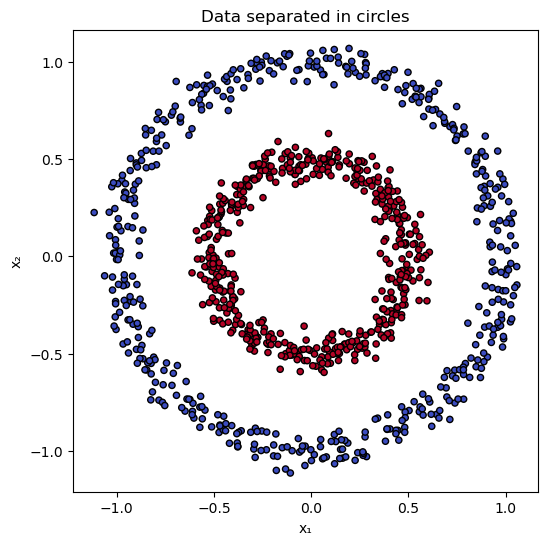

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate synthetic data: points in two concentric circles
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)

# Visualize it
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=20, edgecolor="k")
plt.title("Data separated in circles")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.axis("equal")
plt.show()


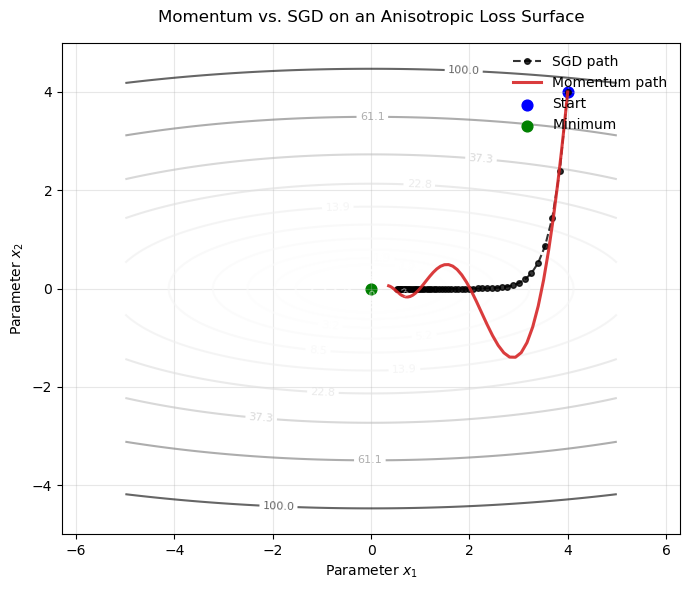

In [56]:
import numpy as np
import matplotlib.pyplot as plt


# Quadratic valley: f(x, y) = 0.5 * (x^2 + 10y^2)
def grad(x, y):
    return np.array([x, 10 * y])


# Parameters
eta = 0.04  # smaller LR for smoother path
beta = 0.85  # moderate momentum
steps = 50
start = np.array([4.0, 4.0])

# --- SGD ---
x_sgd = [start.copy()]
x = start.copy()
for _ in range(steps):
    x -= eta * grad(*x)
    x_sgd.append(x.copy())

# --- Momentum ---
x_mom = [start.copy()]
x = start.copy()
v = np.zeros(2)
for _ in range(steps):
    g = grad(*x)
    v = beta * v + (1 - beta) * g
    x -= eta * v
    x_mom.append(x.copy())

x_sgd = np.array(x_sgd)
x_mom = np.array(x_mom)

# --- Loss surface ---
x_vals = np.linspace(-5, 5, 200)
y_vals = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * (X**2 + 10 * Y**2)

# --- Plot ---
plt.figure(figsize=(7, 6))
contours = plt.contour(X, Y, Z, levels=np.logspace(-1, 2, 15), cmap="Greys", alpha=0.6)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.1f")

# Trajectories
plt.plot(
    x_sgd[:, 0],
    x_sgd[:, 1],
    "o--",
    color="black",
    markersize=4,
    label="SGD path",
    alpha=0.8,
)
plt.plot(
    x_mom[:, 0],
    x_mom[:, 1],
    "-",
    color="#d62728",
    lw=2.2,
    label="Momentum path",
    alpha=0.9,
)

# Start/end markers
plt.scatter(*x_sgd[0], color="blue", s=60, label="Start")
plt.scatter(0, 0, color="green", s=60, label="Minimum")

# Labels & styling
plt.xlabel("Parameter $x_1$")
plt.ylabel("Parameter $x_2$")
plt.title("Momentum vs. SGD on an Anisotropic Loss Surface", pad=15)
plt.legend(loc="upper right", frameon=False)
plt.axis("equal")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


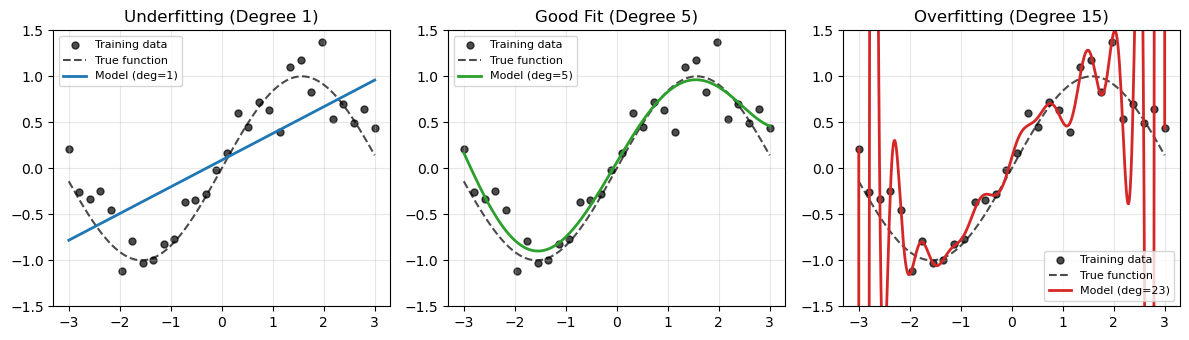

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# --- Generate noisy data ---
np.random.seed(0)
x = np.linspace(-3, 3, 30)
y_true = np.sin(x)
y_noisy = y_true + 0.2 * np.random.randn(len(x))

# --- Fit polynomials of increasing degree ---
degrees = [1, 5, 23]  # underfit, good fit, overfit
colors = ["#1f77b4", "#2ca02c", "#d62728"]
titles = ["Underfitting (Degree 1)", "Good Fit (Degree 5)", "Overfitting (Degree 15)"]

x_fit = np.linspace(-3, 3, 400)

plt.figure(figsize=(12, 3.5))

for i, deg in enumerate(degrees):
    coefs = np.polyfit(x, y_noisy, deg)
    y_pred = np.polyval(coefs, x_fit)

    plt.subplot(1, 3, i + 1)
    plt.scatter(x, y_noisy, color="black", s=25, label="Training data", alpha=0.7)
    plt.plot(x_fit, np.sin(x_fit), "k--", label="True function", alpha=0.7)
    plt.plot(x_fit, y_pred, color=colors[i], lw=2, label=f"Model (deg={deg})")

    plt.title(titles[i])
    plt.ylim(-1.5, 1.5)
    plt.legend(fontsize=8)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
